In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the the original image
original = cv2.imread('1.jpg', 0)

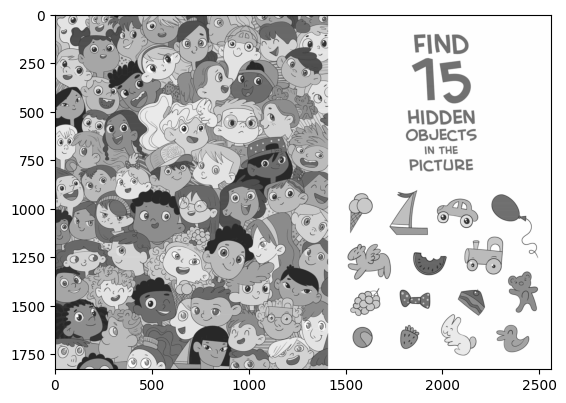

In [6]:
# Show the original image
plt.imshow(original, cmap='gray')

In [7]:
# Create a list to store object images
objects = []

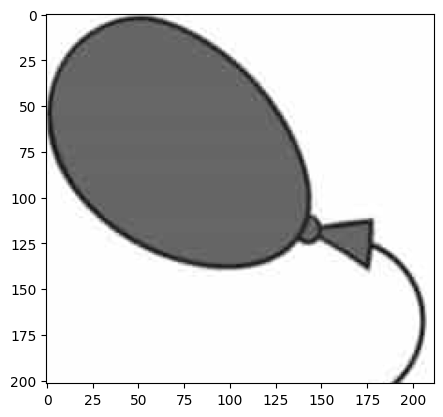

In [8]:
# Take the balloon image
balloon = original[928:1130, 2248:2460]
# Show image of balloon
plt.imshow(balloon, cmap='gray')
# Add the balloon to the list
objects.append(balloon)

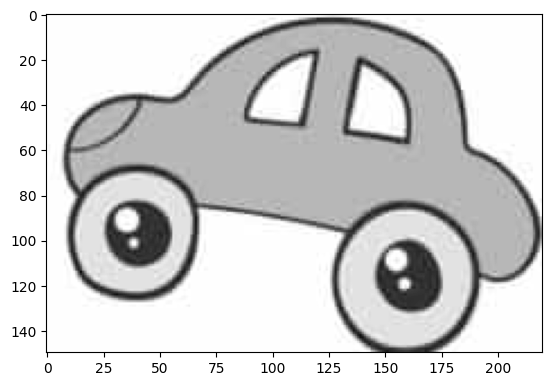

In [9]:
# Take the car image 
car = original[950:1100, 1960:2180]
# Show image of car
plt.imshow(car, cmap='gray')
# Add the car to the list
objects.append(car)

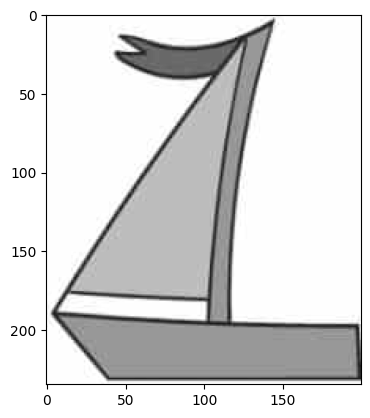

In [10]:
# Take the boat image
boat = original[905:1140, 1720:1920]
# Show image of boat
plt.imshow(boat, cmap='gray')
# Add the boat to the list
objects.append(boat)

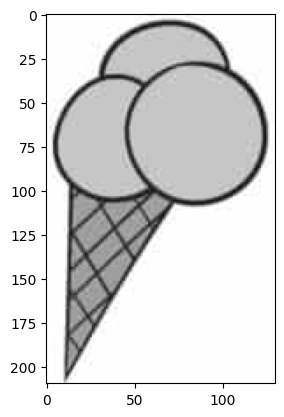

In [11]:
# Take the ice-cream image
ice_cream = original[920:1130, 1510:1640]
# Show image of ice-cream
plt.imshow(ice_cream, cmap='gray')
# Add the ice-cream to the list
objects.append(ice_cream)

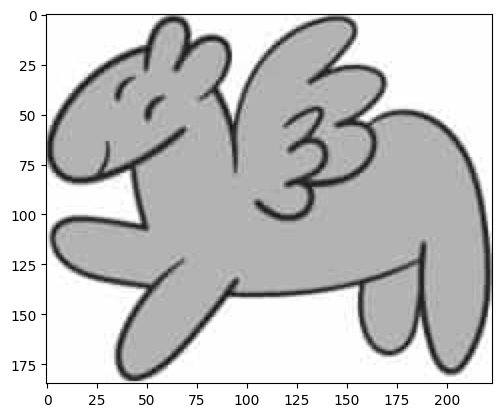

In [12]:
# Take the horse image
horse = original[1184:1369, 1507:1730]
# Show image of horse
plt.imshow(horse, cmap='gray')
# Add the horse to the list
objects.append(horse)

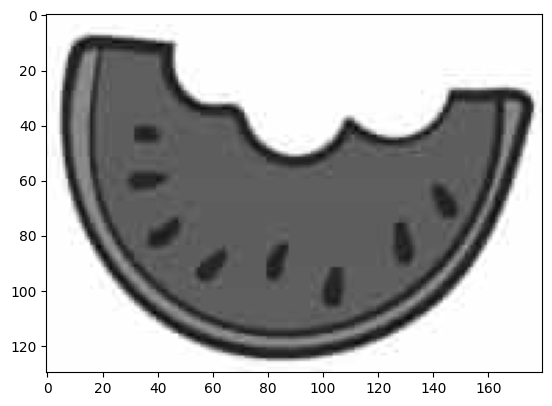

In [13]:
# Take the watermelon image
watermelon = original[1220:1350, 1840:2020]
# Show image of watermelon
plt.imshow(watermelon, cmap='gray')
# Add the watermelon to the list
objects.append(watermelon)

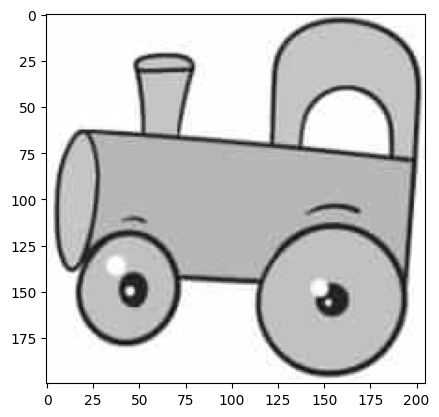

In [14]:
# Take the train image
train = original[1145:1345, 2105:2310]
# Show image of train
plt.imshow(train, cmap='gray')
# Add the train to the list
objects.append(train)

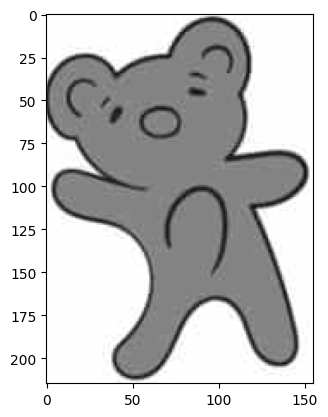

In [15]:
# Take the teddy bear image
teddy_bear = original[1325:1540, 2335:2490]
# Show image of teddy bear
plt.imshow(teddy_bear, cmap='gray')
# Add the teddy bear to the list
objects.append(teddy_bear)

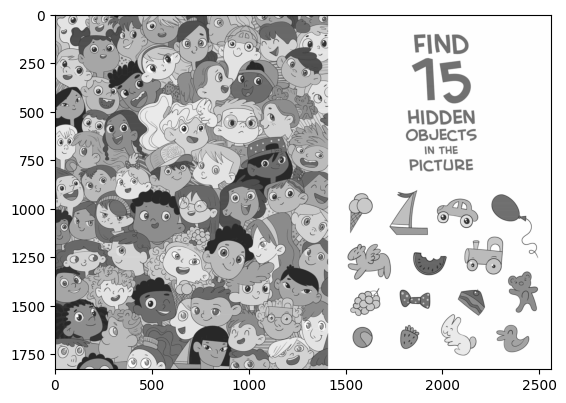

In [16]:
# Show the original image
plt.imshow(original, cmap='gray')

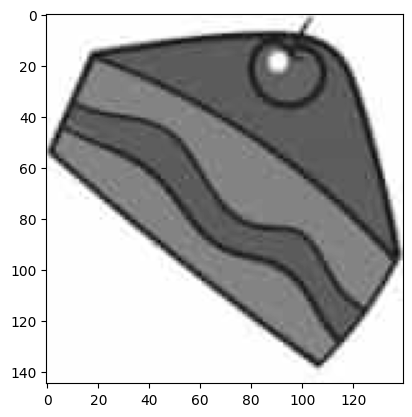

In [17]:
# Take the cake image
cake = original[1415:1560, 2075:2215]
# Show image of cake
plt.imshow(cake, cmap='gray')
# Add the cake to the list
objects.append(cake)

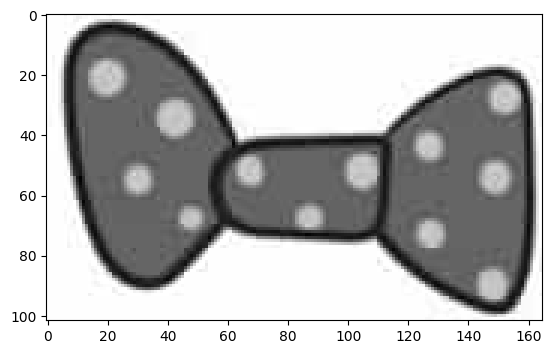

In [18]:
# Take the tie image
tie = original[1418:1520, 1770:1935]
# Show image of tie
plt.imshow(tie, cmap='gray')
# Add the tie to the list
objects.append(tie)

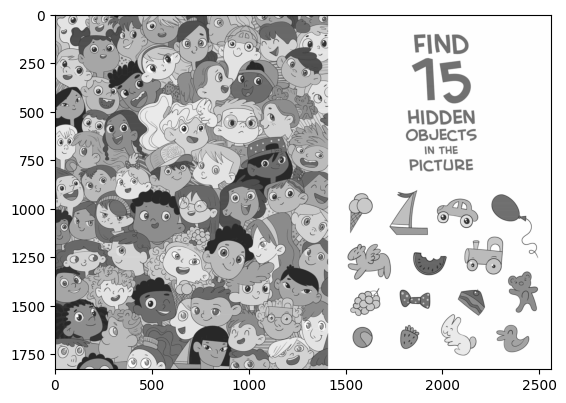

In [19]:
# Show the original image
plt.imshow(original, cmap='gray')

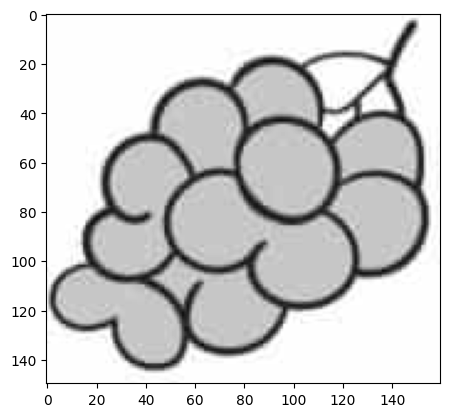

In [20]:
# Take the grapes image
grapes = original[1410:1560, 1520:1680]
# Show image of grapes
plt.imshow(grapes, cmap='gray')
# Add the grapes to the list
objects.append(grapes)

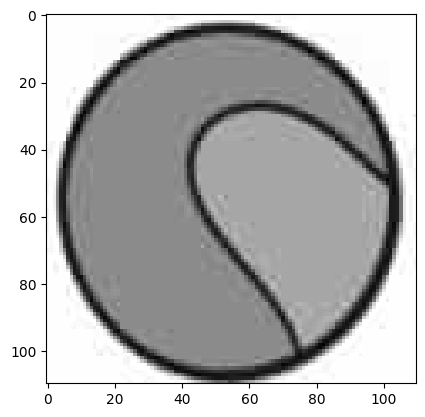

In [21]:
# Take the ball image
ball = original[1610:1720, 1530:1640]
# Show image of ball
plt.imshow(ball, cmap='gray')
# Add the ball to the list
objects.append(ball)

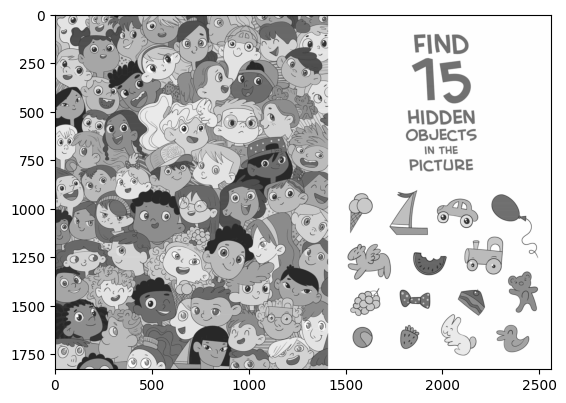

In [22]:
# Show the original image
plt.imshow(original, cmap='gray')

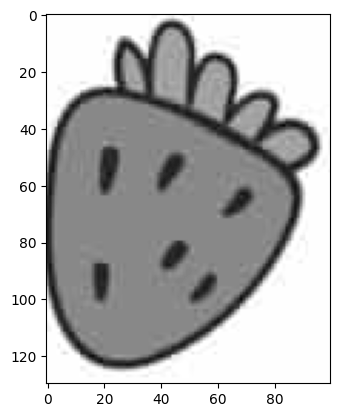

In [23]:
# Take the strawberry image
strawberry = original[1600:1730, 1780:1880]
# Show image of strawberry
plt.imshow(strawberry, cmap='gray')
# Add the strawberry to the list
objects.append(strawberry)

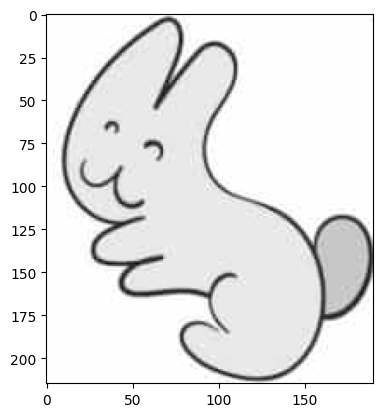

In [24]:
# Take the rabbit image
rabbit = original[1545:1760, 1980:2170]
# Show image of rabbit
plt.imshow(rabbit, cmap='gray')
# Add the rabbit to the list
objects.append(rabbit)

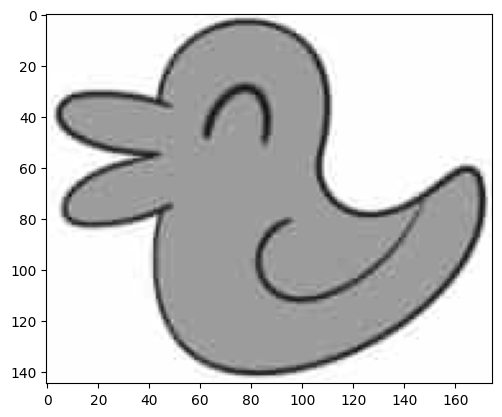

In [25]:
# Take the duck image
duck = original[1600:1745, 2270:2445]
# Show image of duck
plt.imshow(duck, cmap='gray')
# Add the duck to the list
objects.append(duck)

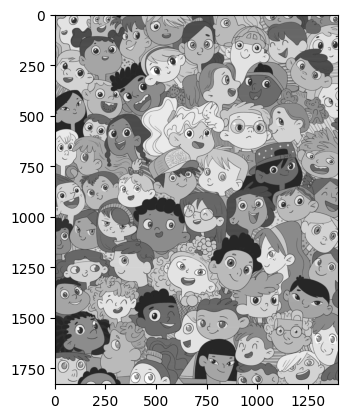

In [26]:
# Take the target image 
target = original[0:original.shape[0], 0:1400]
# Show the target image
plt.imshow(target, cmap='gray')

In [27]:
# Edge detection 
def edge_detection(image):
    # Apply Gaussian blur
    blur = cv2.GaussianBlur(image, (5,5), 0)
    # Apply Canny edge detection
    edges = cv2.Canny(blur, 0, 50)
    return edges

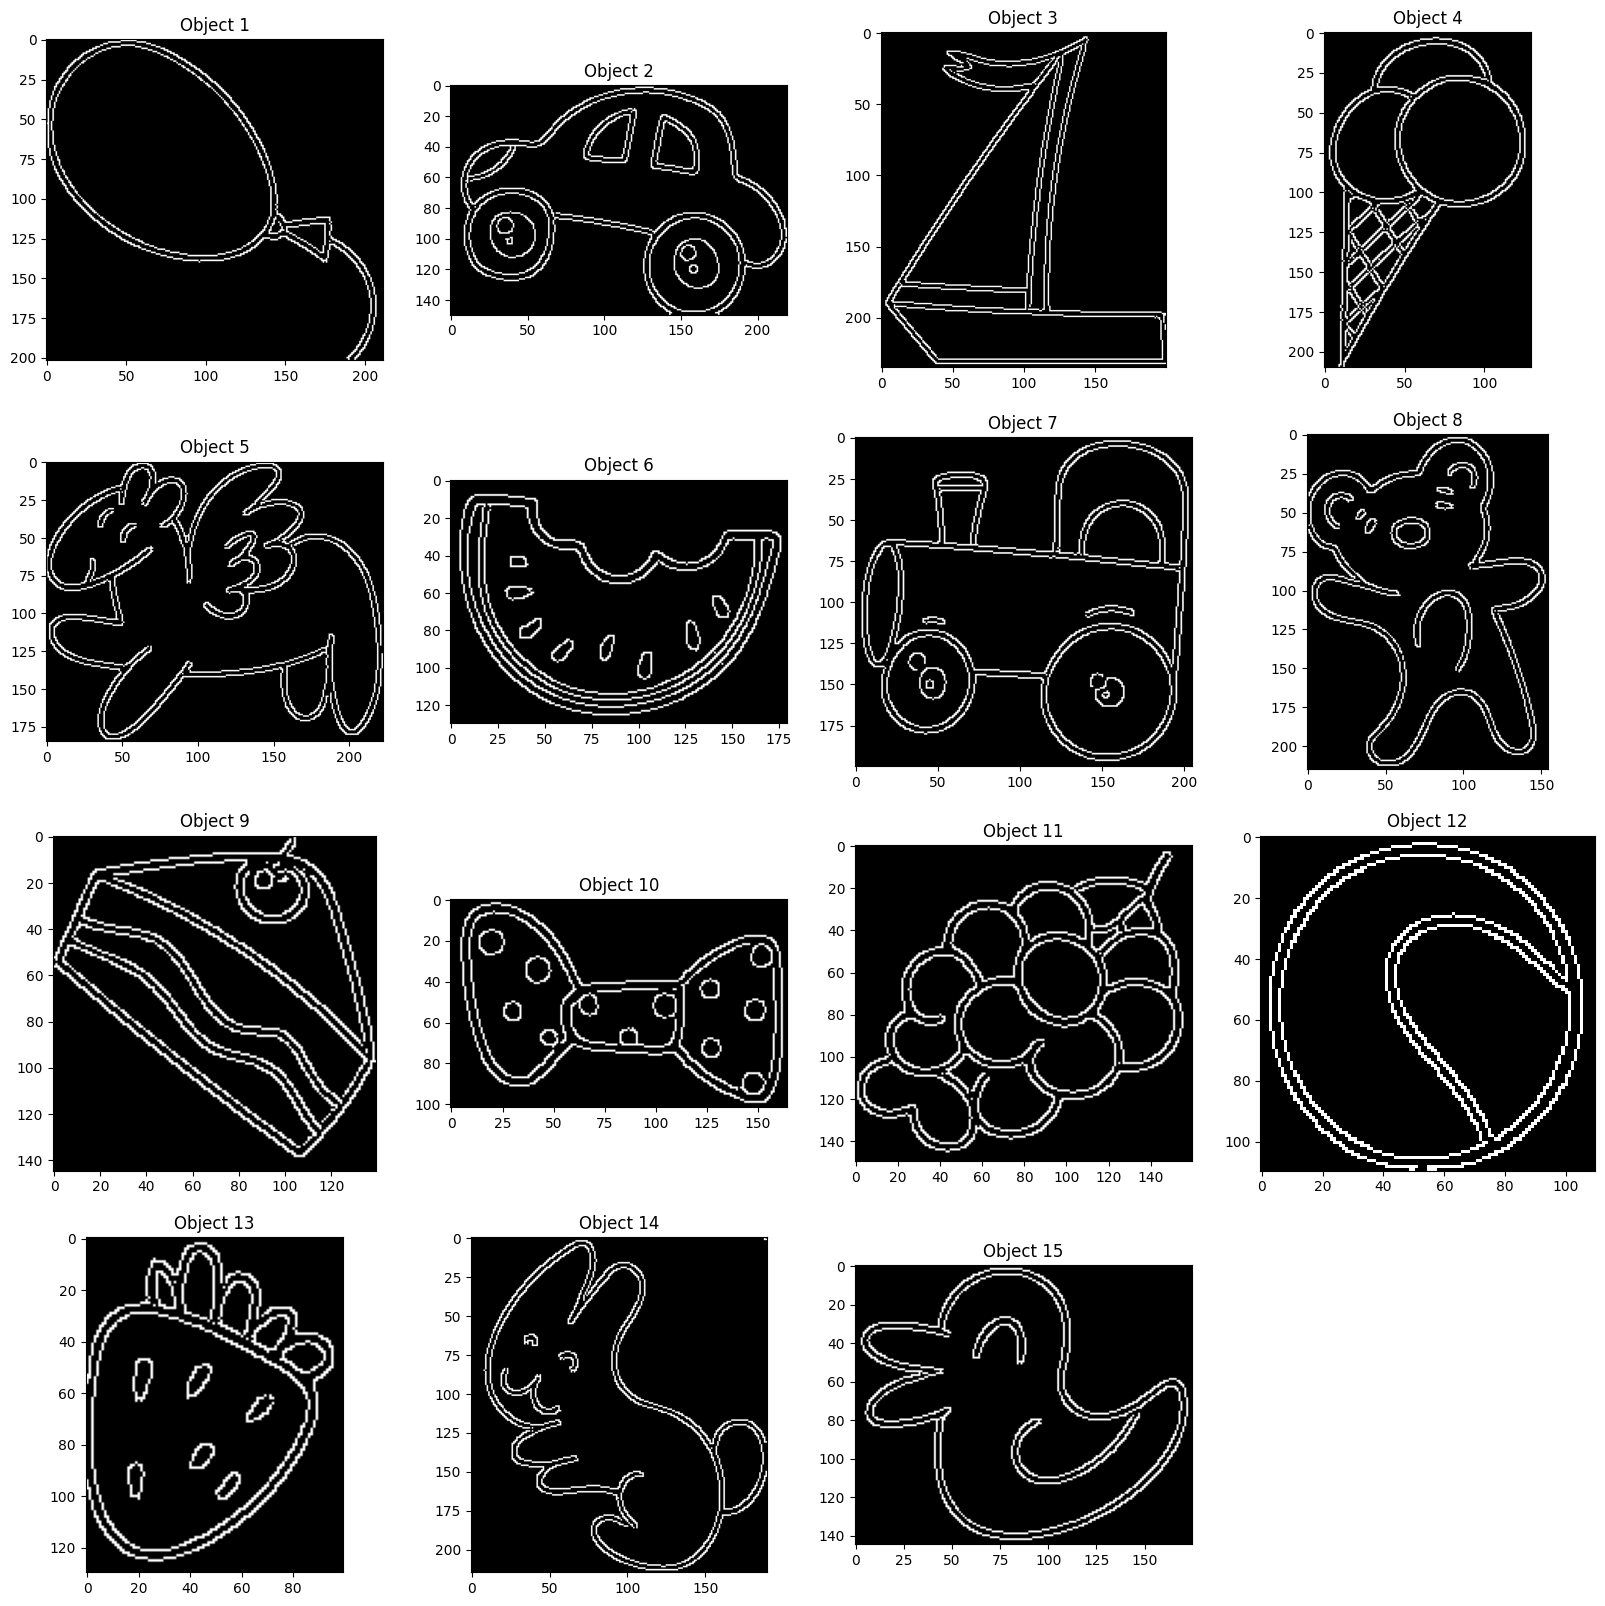

In [28]:
# Apply edge detection to object images
edges = []
for obj in objects:
    edges.append(edge_detection(obj))

# Show the objects edge detection results by subplot
plt.figure(figsize=(20, 20))
for i in range(len(objects)):
    plt.subplot(4, 4, i+1)
    plt.imshow(edges[i], cmap='gray')
    plt.title('Object ' + str(i+1))
plt.show()


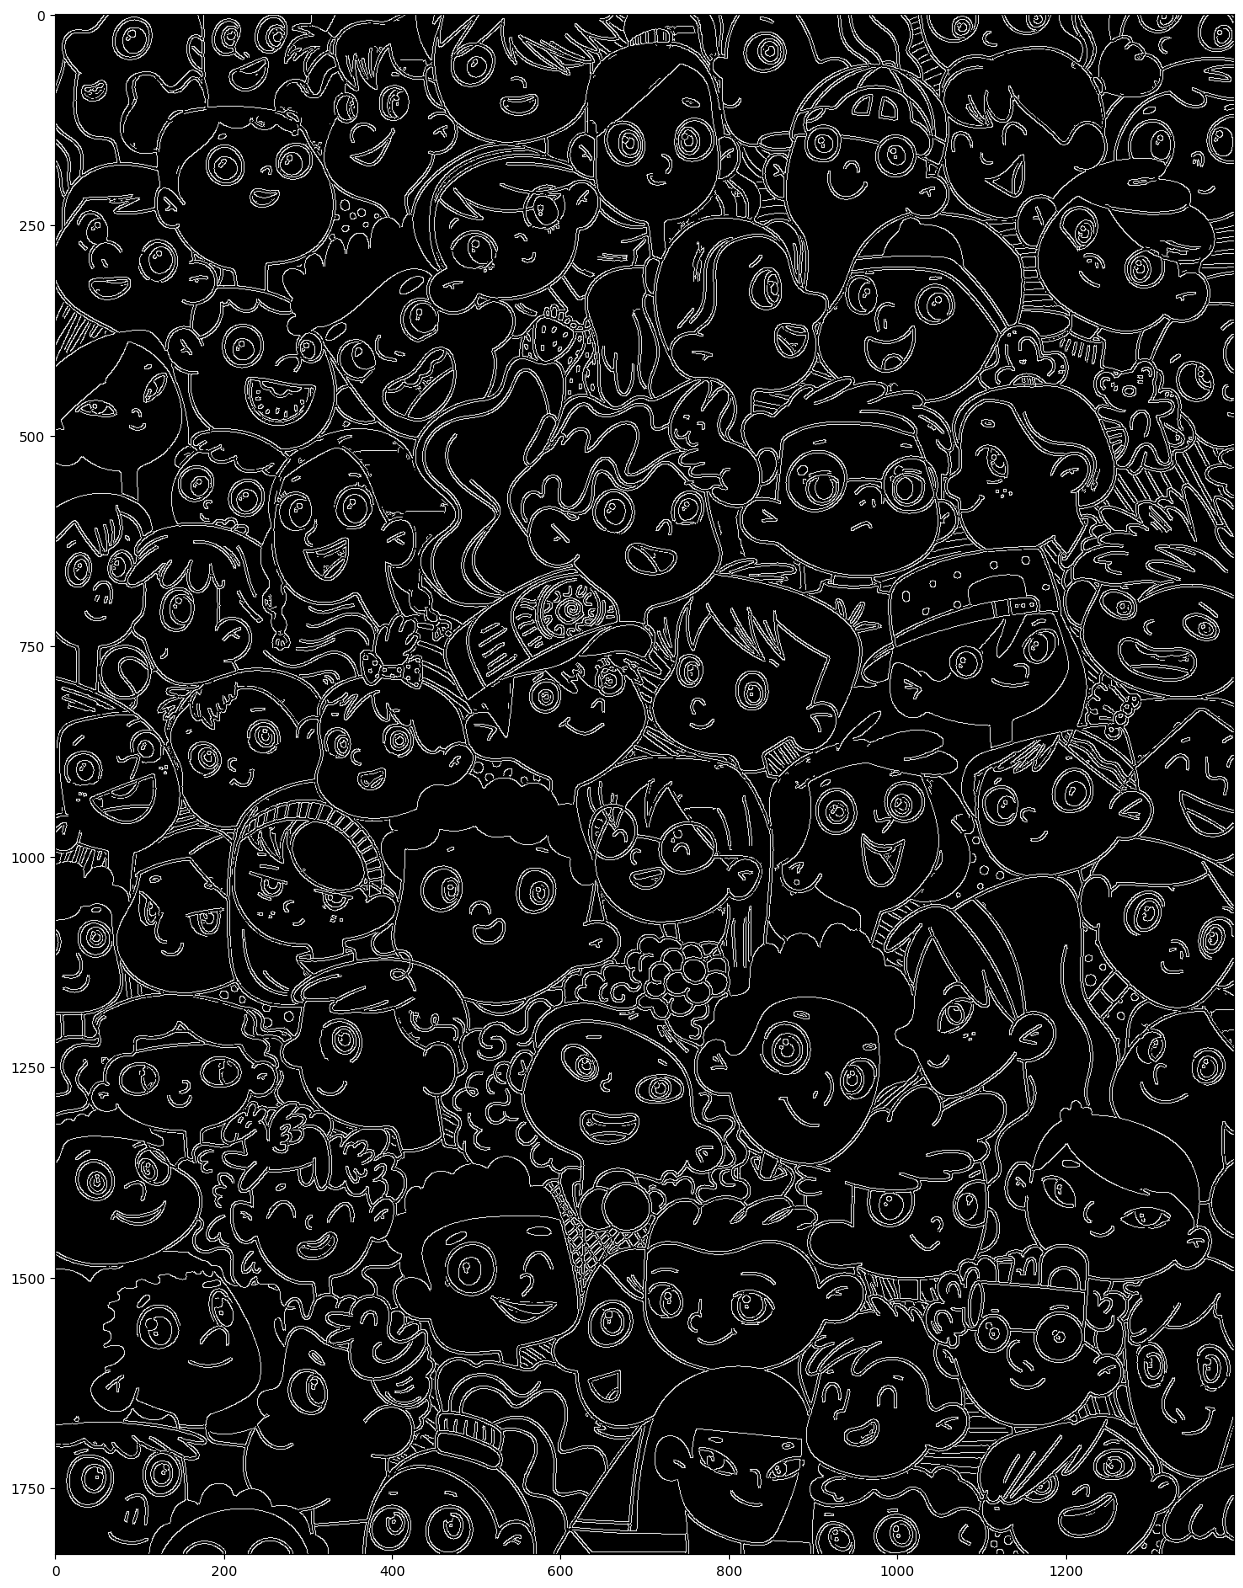

In [29]:
# Apply edge detection to the target image
target_edges = edge_detection(target)
# Show the target edge detection result with a bigger size
plt.figure(figsize=(20, 20))
plt.imshow(target_edges, cmap='gray', )

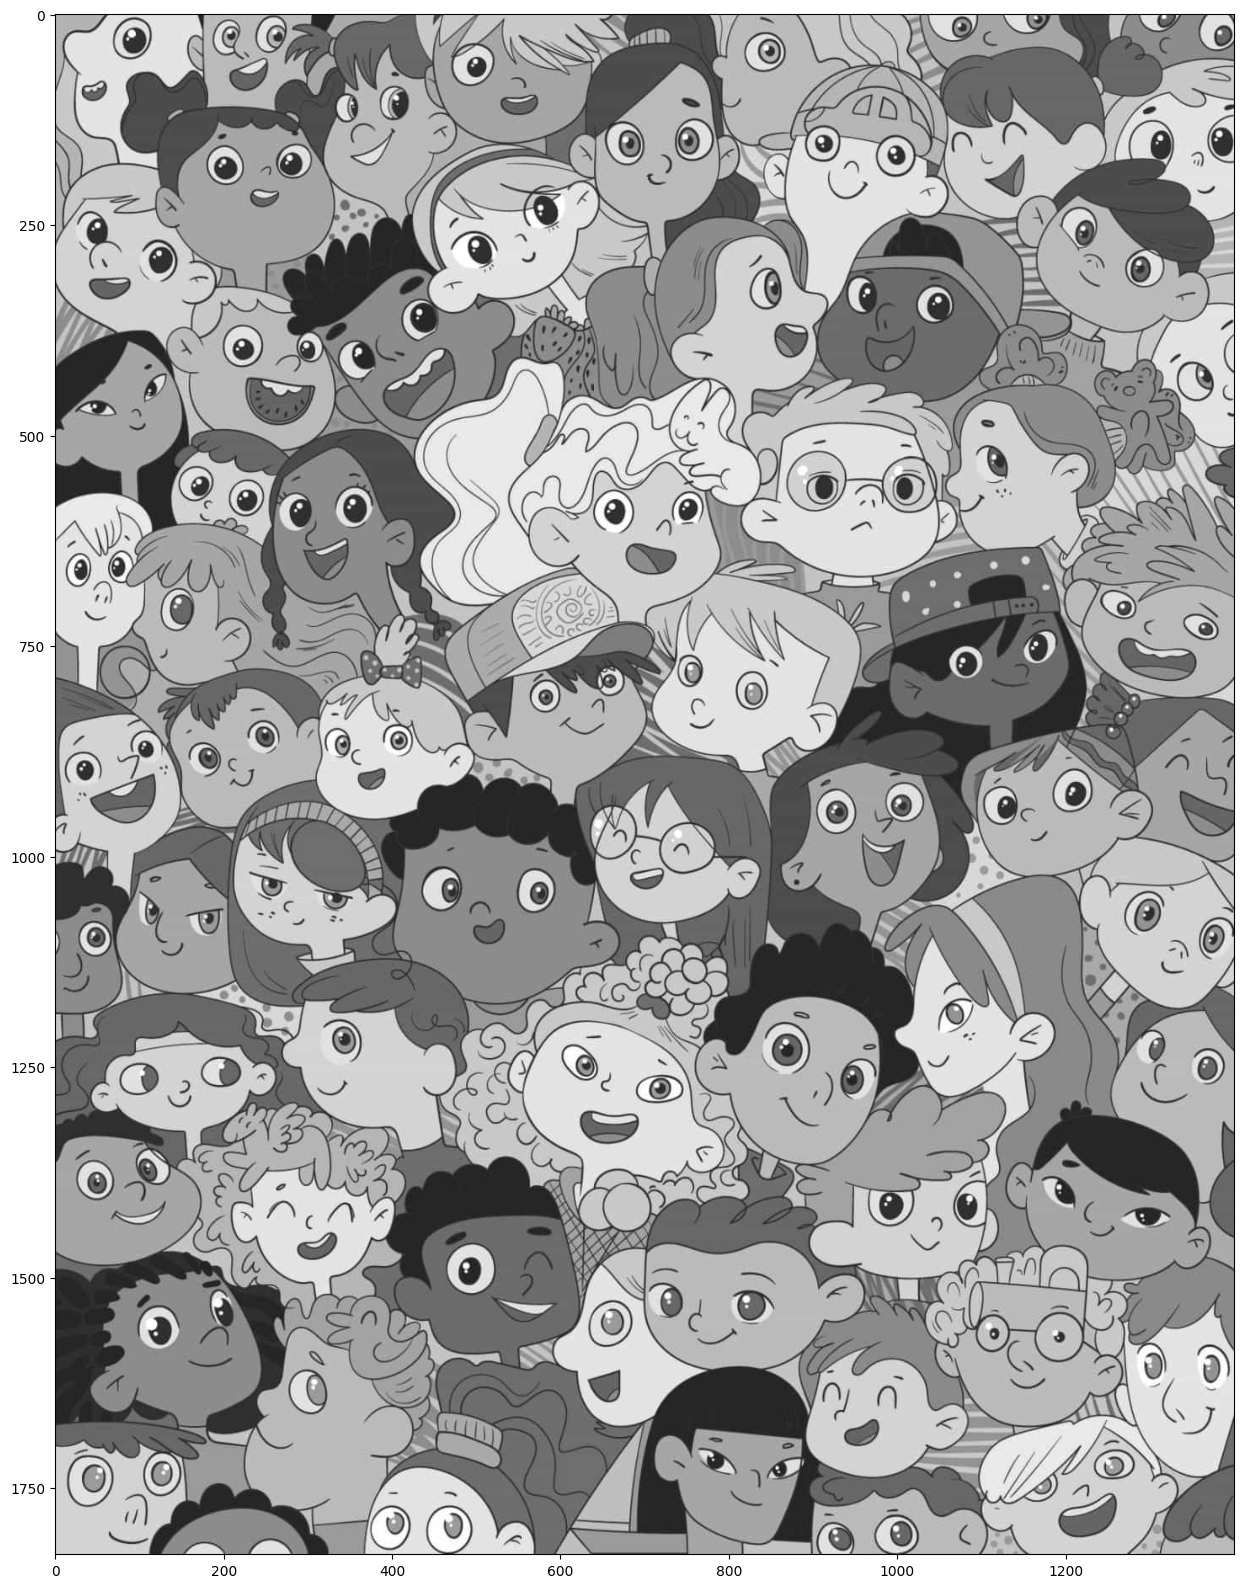

In [30]:
# Show the target image
plt.figure(figsize=(20, 20))
plt.imshow(target, cmap='gray')

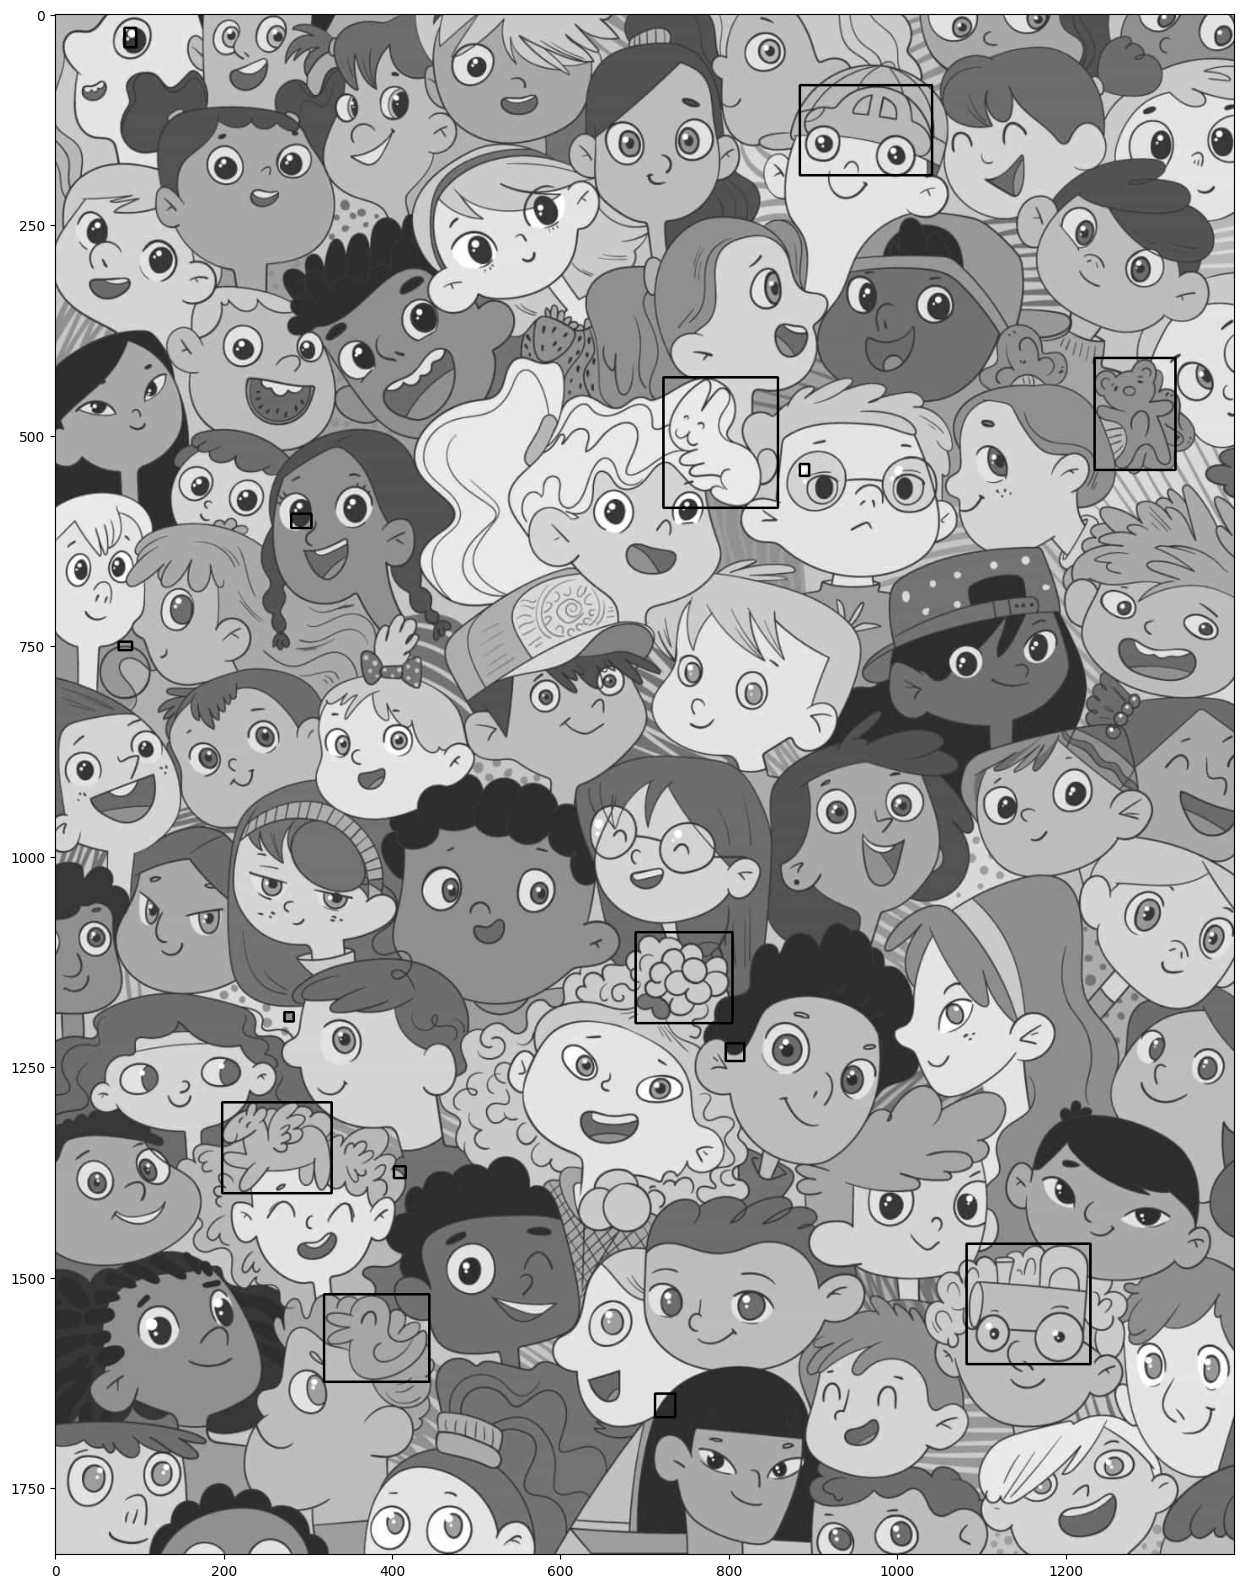

In [31]:
# Use template matching to find the object in the target image with edged images
def template_matching(target, template):
    # Initialize variables
    max_val = 0
    best_loc = None
    best_scale = None
    threshold = 0.4
    
    # Loop over different scales of the template
    for scale in np.linspace(0.1, 1.5, 400):
        # Resize the template
        resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
        
        # Apply template matching
        res = cv2.matchTemplate(target, resized_template, cv2.TM_CCOEFF_NORMED)
        
        # Get the best match position and its score
        min_val, max_val_curr, min_loc, max_loc = cv2.minMaxLoc(res)
        
        # If the match is above the threshold and better than previous matches
        if max_val_curr >= threshold and max_val_curr > max_val:
            max_val = max_val_curr
            best_loc = max_loc
            best_scale = scale
    
    if best_loc is not None:
        return best_loc, best_scale
    else:
        print("Object not found.")
        return None, None

# Find the objects in the target image
locations = []
scales = []
for edge in edges:
    loc, scale = template_matching(target_edges, edge)
    locations.append(loc)
    scales.append(scale)

# Show the objects in the target image

target_copy = target.copy()
for i, loc in enumerate(locations):
    if loc is not None:
        # Calculate the size of the scaled template
        template_shape = (int(objects[i].shape[1] * scales[i]), int(objects[i].shape[0] * scales[i]))
        # Draw rectangle on the target image
        cv2.rectangle(target_copy, loc, (loc[0] + template_shape[0], loc[1] + template_shape[1]), (0, 255, 0), 2)

# Show the target image with the objects
plt.figure(figsize=(20, 20))
plt.imshow(target_copy, cmap='gray')
plt.show()
